In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\sures\Downloads\height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


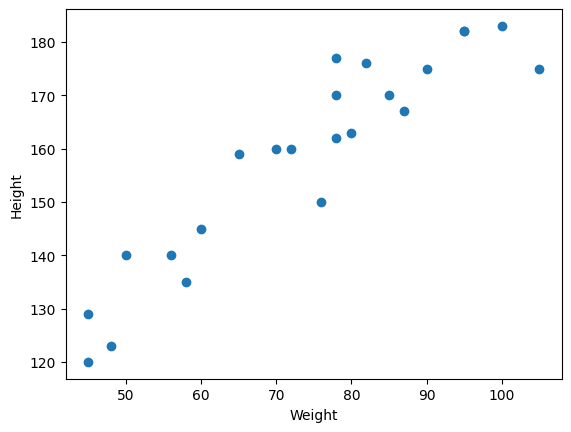

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [11]:
X = df[["Weight"]]
y = df['Height']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=43)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

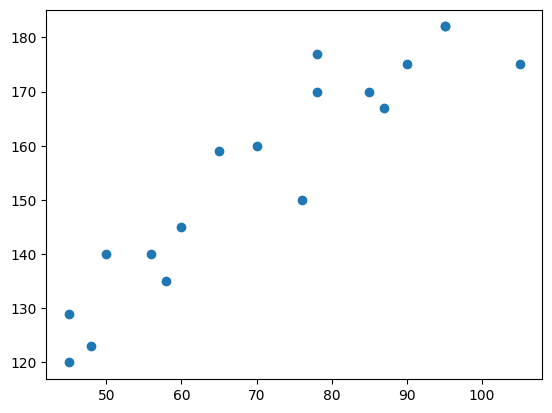

In [14]:
plt.scatter(X_train,y_train)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Coefficient",lr.coef_[0])
print("Intercept",lr.intercept_)

Coefficient 18.661478542494113
Intercept 155.5


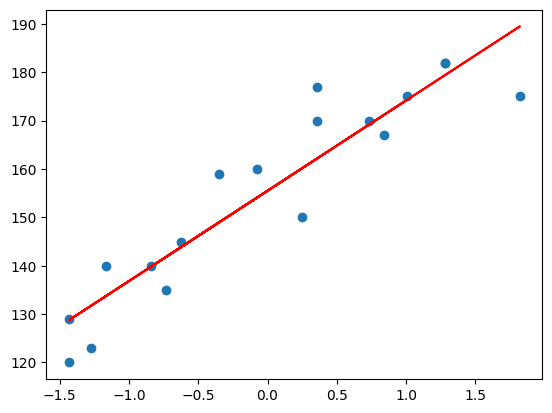

In [24]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,lr.predict(X_train_scaled),'r-')

In [25]:
y_pred_test = lr.predict(X_test_scaled)

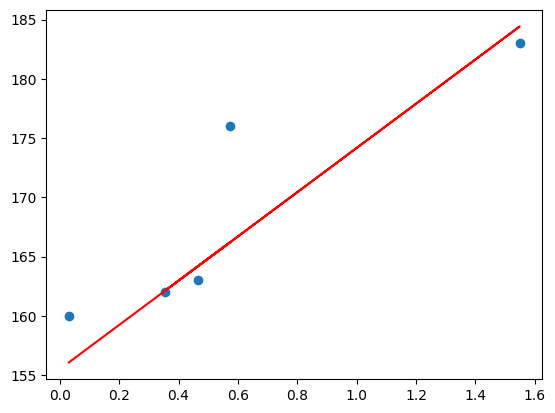

In [27]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,lr.predict(X_test_scaled),'r-')

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

23.030460001118104
3.292633109213159
4.799006147226539


In [31]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)

0.7196876825569851


In [32]:
## Adjusted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6262502434093136